  STUDENT_ID STUDENT_NAME  GENDER  AGE_MIN  AGE_MAX REGION  DEPRESSION_MIN  \
0       S001        Alice  Female       18       22  North               5   
1       S002          Bob    Male       19       22  South               3   
2       S003      Charlie    Male       20       23   East               6   
3       S004        David    Male       21       24   West               2   
4       S005          Eva  Female       18       21  North               8   

   DEPRESSION_MAX  YEAR  DEPRESSION_MEAN  AGE_MEAN  
0               8  2020              6.5      20.0  
1               5  2021              4.0      20.5  
2               7  2020              6.5      21.5  
3               4  2021              3.0      22.5  
4               9  2022              8.5      19.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STUDENT_ID    

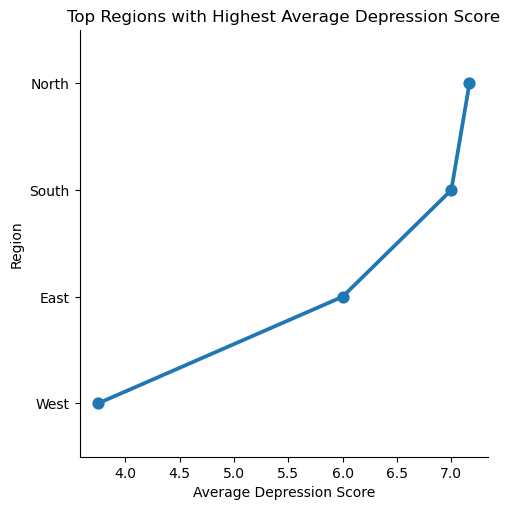

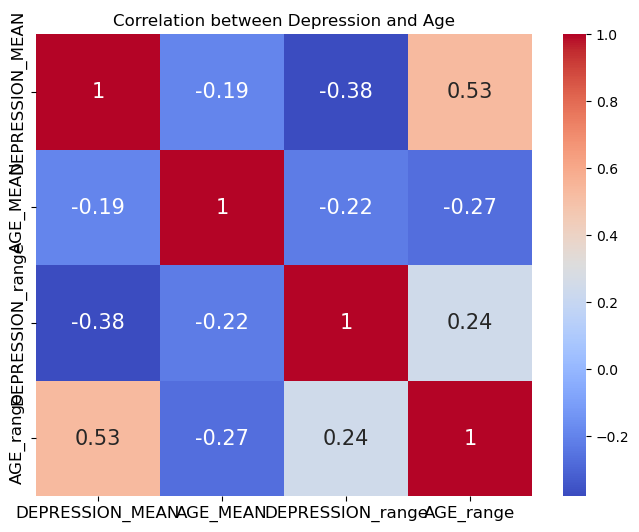

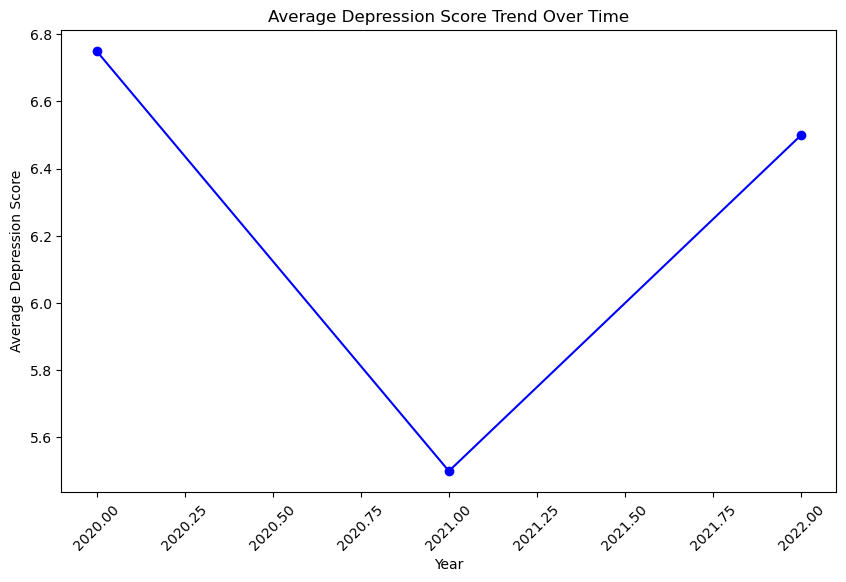

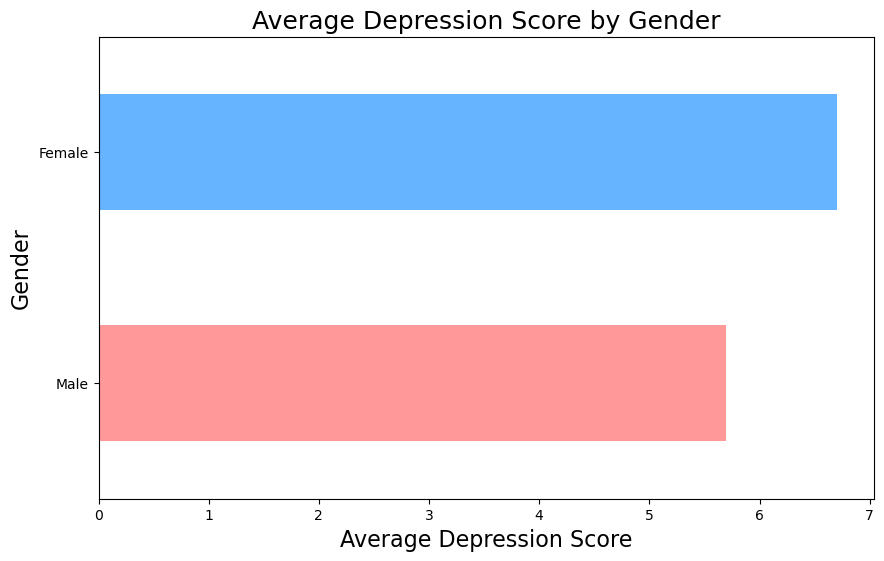

C:\Users\User\AppData\Local\Temp\ipykernel_28160\1698396379.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['REGION', 'DEPRESSION_STATUS']).size().unstack().plot(


<Figure size 1000x600 with 0 Axes>

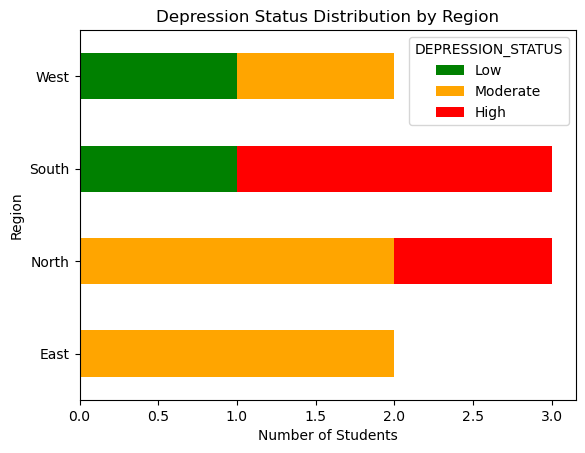

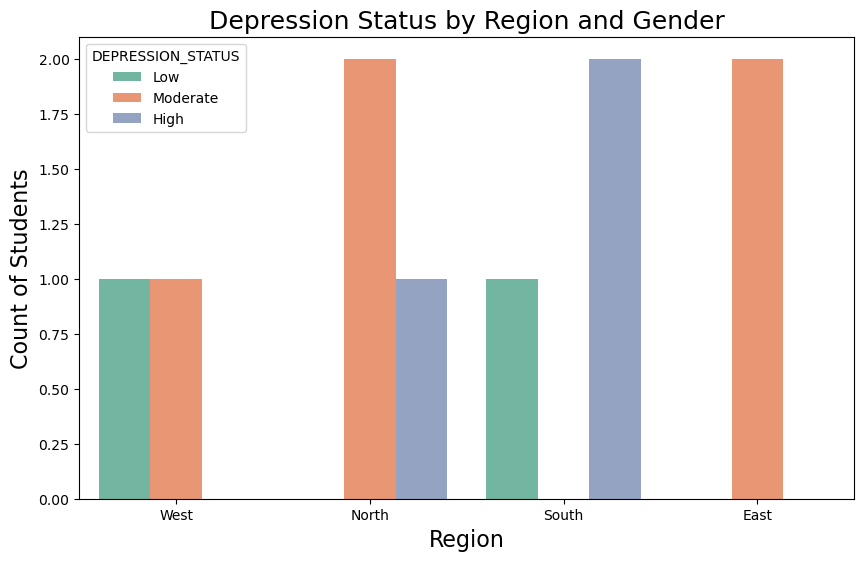

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Simulated dataset creation
data = {
    'STUDENT_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010'],
    'STUDENT_NAME': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Fay', 'George', 'Hannah', 'Ivy', 'Jack'],
    'GENDER': ['Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'AGE_MIN': [18, 19, 20, 21, 18, 22, 20, 19, 21, 18],
    'AGE_MAX': [22, 22, 23, 24, 21, 25, 22, 22, 24, 23],
    'REGION': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'DEPRESSION_MIN': [5, 3, 6, 2, 8, 7, 5, 4, 6, 9],
    'DEPRESSION_MAX': [8, 5, 7, 4, 9, 8, 6, 5, 7, 10],
    'YEAR': [2020, 2021, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021]
}

# Create DataFrame
df = pd.DataFrame(data)

# Feature Engineering: Mean depression score, average age
df['DEPRESSION_MEAN'] = (df['DEPRESSION_MIN'] + df['DEPRESSION_MAX']) / 2
df['AGE_MEAN'] = (df['AGE_MIN'] + df['AGE_MAX']) / 2

# Display the first few rows of the dataset
print(df.head())

# Data Cleaning and Preparation
# Convert column names to uppercase for consistency
df.columns = df.columns.str.upper()

# Sort the data by year in descending order
df.sort_values(by="YEAR", inplace=True, ascending=False, ignore_index=True)

# Drop rows with missing values (if any)
df.dropna(axis=0, inplace=True)

# Reset the index
df.reset_index(inplace=True, drop=True)

# Check the info of the DataFrame
df.info()

# Exploratory Data Analysis: Unique values, visualizations, and analysis

# Unique values of GENDER and REGION
unique_gender = df['GENDER'].unique()
print("Unique Genders:", unique_gender)
unique_regions = df['REGION'].unique()
print("Unique Regions:", unique_regions)

# Calculate the average depression score by region
top_regions = df.groupby('REGION')['DEPRESSION_MEAN'].mean().sort_values(ascending=False).to_frame().reset_index()

# Visualizing the top regions with the highest average depression scores
sb.catplot(data=top_regions, x='DEPRESSION_MEAN', y='REGION', kind='point')
plt.title('Top Regions with Highest Average Depression Score')
plt.xlabel('Average Depression Score')
plt.ylabel('Region')
plt.show()

# Correlation heatmap between depression score and age
df['DEPRESSION_range'] = df['DEPRESSION_MAX'] - df['DEPRESSION_MIN']
df['AGE_range'] = df['AGE_MAX'] - df['AGE_MIN']

# Heatmap showing the correlation between depression score, age, and other numeric features
plt.figure(figsize=(8, 6))
ax = sb.heatmap(df[['DEPRESSION_MEAN', 'AGE_MEAN', 'DEPRESSION_range', 'AGE_range']].corr(),
                annot=True,
                cmap="coolwarm",
                annot_kws={"size": 15})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlation between Depression and Age')
plt.show()

# Plotting depression score trends over time (by year)
plt.figure(figsize=(10, 6))
df.groupby('YEAR')['DEPRESSION_MEAN'].mean().plot(kind='line', marker='o', color='b')
plt.title('Average Depression Score Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=45)
plt.show()

# Average depression score by gender
plt.figure(figsize=(10, 6))
df.groupby('GENDER')['DEPRESSION_MEAN'].mean().sort_values().plot(kind='barh', color=['#ff9999', '#66b3ff'])
plt.xlabel("Average Depression Score", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.title("Average Depression Score by Gender", fontsize=18)
plt.show()

# Visualizing the distribution of depression levels by region
# Assuming 'DEPRESSION_STATUS' is a column with values like 'Low', 'Moderate', 'High'
df['DEPRESSION_STATUS'] = pd.cut(df['DEPRESSION_MEAN'], bins=[0, 4, 7, 10], labels=['Low', 'Moderate', 'High'])

# Plot the distribution of depression statuses by region
plt.figure(figsize=(10, 6))
df.groupby(['REGION', 'DEPRESSION_STATUS']).size().unstack().plot(
    kind='barh',
    stacked=True,
    color={'Low': 'green', 'Moderate': 'orange', 'High': 'red'}
)
plt.xlabel("Number of Students")
plt.ylabel("Region")
plt.title("Depression Status Distribution by Region")
plt.show()

# Visualizing depression status by region and gender
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='REGION', hue='DEPRESSION_STATUS', palette='Set2')
plt.xlabel("Region", fontsize=16)
plt.ylabel("Count of Students", fontsize=16)
plt.title("Depression Status by Region and Gender", fontsize=18)
plt.show()